#**Long project: Graph construction of SNPs data**
**Supervisor**: Madeleine DE SOUSA VIOLANTE <br/>
**Student**: Valentin BALOCHE <br/> <br/>

##**Packages**

In [3]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
import pandas as pd
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import random

##**Data importation and creation of distances matrix**
Method 1: identity method

In [4]:
# Creation of a 'MultipleSeqAlignment object":
all_align = AlignIO.read('/content/drive/MyDrive/long_project/first_alignment.fasta','fasta')
monophasic_align = AlignIO.read('/content/drive/MyDrive/long_project/SNPs_alignment_only_monophasic_variant.fasta','fasta')
typhimurium_align = AlignIO.read('/content/drive/MyDrive/long_project/SNPs_alignment_only_typhimurium.fasta','fasta')

# Creation of the calculator
calculator = DistanceCalculator('identity')

In [5]:
%%time

all_distance = calculator.get_distance(all_align)
monophasic_distance = calculator.get_distance(monophasic_align)
typhimurium_distance = calculator.get_distance(typhimurium_align)

CPU times: user 1min 43s, sys: 82.2 ms, total: 1min 44s
Wall time: 1min 44s


In [6]:
# To remove message 'FutureWarning: `distplot` is a deprecated function and will be removed in a future version.' from distplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

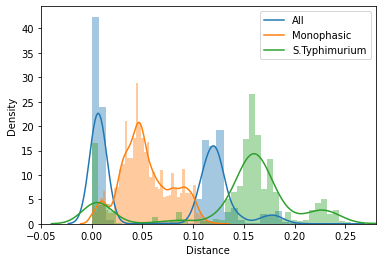

In [7]:
fig = sns.distplot(list(all_distance))
fig = sns.distplot(list(monophasic_distance))
fig = sns.distplot(list(typhimurium_distance))

fig.legend(labels=['All', 'Monophasic', 'S.Typhimurium'])
fig.set(xlabel='Distance')
fig.set_xlim(-0.05, 0.28)

plt.show()

Method 2: distance matrix

In [8]:
%%time

all_id_list = []
monophasic_id_list = []
typhimurium_id_list = []

seq_list = []

#All
for record in SeqIO.parse('/content/drive/MyDrive/long_project/first_alignment.fasta', 'fasta'):
  all_id_list.append(record.id)
  seq_list.append(record.seq)

all_df = pd.DataFrame(np.asarray(seq_list),
                      index=all_id_list,
                      columns=range(len(seq_list[:][0])))

#Monophasic
seq_list.clear()

for record in SeqIO.parse('/content/drive/MyDrive/long_project/SNPs_alignment_only_monophasic_variant.fasta', 'fasta'):
  monophasic_id_list.append(record.id)
  seq_list.append(record.seq)

monophasic_df = pd.DataFrame(np.asarray(seq_list),
                      index=monophasic_id_list,
                      columns=range(len(seq_list[:][0])))

#Typhimurium
seq_list.clear()

for record in SeqIO.parse('/content/drive/MyDrive/long_project/SNPs_alignment_only_typhimurium.fasta', 'fasta'):
  typhimurium_id_list.append(record.id)
  seq_list.append(record.seq)

typhimurium_df = pd.DataFrame(np.asarray(seq_list),
                      index=typhimurium_id_list,
                      columns=range(len(seq_list[:][0])))

CPU times: user 1.7 s, sys: 11.9 ms, total: 1.72 s
Wall time: 1.73 s


In [9]:
all_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5305,5306,5307,5308,5309,5310,5311,5312,5313,5314,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324,5325,5326,5327,5328,5329,5330,5331,5332
count,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,C,A,C,A,C,G,T,G,G,G,G,C,C,G,A,C,C,C,C,G,G,C,C,A,G,C,C,C,C,G,G,C,C,T,C,C,C,A,A,T,...,G,G,C,C,C,T,C,C,C,G,A,T,A,G,C,C,G,C,A,C,T,T,C,T,T,C,G,C,A,C,T,G,T,T,G,C,A,C,G,C
freq,178,173,179,178,179,169,167,178,178,178,178,172,172,179,167,179,179,179,179,179,179,178,178,179,179,159,168,178,166,179,179,165,178,178,167,167,178,167,169,173,...,179,179,173,179,169,123,179,169,179,179,123,105,169,177,177,179,172,178,178,172,123,179,167,179,167,179,178,179,167,169,178,179,123,123,178,179,169,179,179,179


In [10]:
# Checking for each colmun that it can only take 2 values
unique_list=[]
for i in range(len(all_df.columns)):
  unique_list.append(all_df[i].describe()['unique'])

unique_list2=[]
for i in range(len(monophasic_df.columns)):
  unique_list2.append(monophasic_df[i].describe()['unique'])

unique_list3=[]
for i in range(len(typhimurium_df.columns)):
  unique_list3.append(typhimurium_df[i].describe()['unique'])

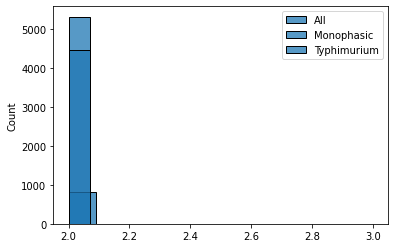

In [11]:
fig = sns.histplot(unique_list)
fig = sns.histplot(unique_list2)
fig = sns.histplot(unique_list3)

fig.legend(labels=['All', 'Monophasic', 'Typhimurium'])

plt.show()

In [12]:
%%time

# Counting to find the majority nucleotide
letter_count = all_df.describe()

# Replace the majority nucleotide by 1 (otherwise 0)
for i in range(len(all_df.columns)):
  all_df[i] = all_df[i].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

letter_count = monophasic_df.describe()
for i in range(len(monophasic_df.columns)):
  monophasic_df[i] = monophasic_df[i].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

letter_count = typhimurium_df.describe()
for i in range(len(typhimurium_df.columns)):
  typhimurium_df[i] = typhimurium_df[i].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

CPU times: user 54.4 s, sys: 950 ms, total: 55.4 s
Wall time: 54.6 s


In [13]:
%%time

#Distance matrices
all_distance2 = distance_matrix(np.asarray(all_df), np.asarray(all_df))
monophasic_distance2 = distance_matrix(np.asarray(monophasic_df), np.asarray(monophasic_df))
typhimurium_distance2 = distance_matrix(np.asarray(typhimurium_df), np.asarray(typhimurium_df))

CPU times: user 1.75 s, sys: 43.1 ms, total: 1.79 s
Wall time: 1.79 s


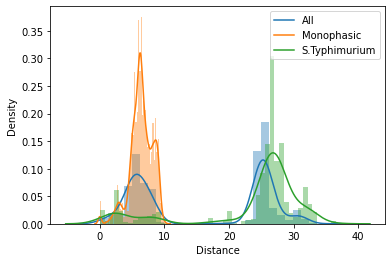

In [14]:
fig = sns.distplot(all_distance2)
fig = sns.distplot(monophasic_distance2)
fig = sns.distplot(typhimurium_distance2)

fig.legend(labels=['All', 'Monophasic', 'S.Typhimurium'])
fig.set(xlabel='Distance')

plt.show()

##**Graph generation**

In [15]:
%%time

# Identity method
all_graph = nx.convert_matrix.from_numpy_matrix(np.asarray(all_distance))
monophasic_graph = nx.convert_matrix.from_numpy_matrix(np.asarray(monophasic_distance))
typhimurium_graph = nx.convert_matrix.from_numpy_matrix(np.asarray(typhimurium_distance))

CPU times: user 182 ms, sys: 0 ns, total: 182 ms
Wall time: 184 ms


In [16]:
%%time

# Distances matrices
all_graph2 = nx.convert_matrix.from_numpy_matrix(all_distance2)
monophasic_graph2 = nx.convert_matrix.from_numpy_matrix(monophasic_distance2)
typhimurium_graph2 = nx.convert_matrix.from_numpy_matrix(typhimurium_distance2)

CPU times: user 135 ms, sys: 950 µs, total: 136 ms
Wall time: 140 ms


Node positioning

In [17]:
%%time

all_node_pos = nx.kamada_kawai_layout(all_graph)
monophasic_node_pos = nx.kamada_kawai_layout(monophasic_graph)
typhimurium_node_pos = nx.kamada_kawai_layout(typhimurium_graph)

CPU times: user 21 s, sys: 166 ms, total: 21.1 s
Wall time: 21.1 s


In [18]:
%%time

all_node_pos2 = nx.kamada_kawai_layout(all_graph2)
monophasic_node_pos2 = nx.kamada_kawai_layout(monophasic_graph2)
typhimurium_node_pos2 = nx.kamada_kawai_layout(typhimurium_graph2)

CPU times: user 7.34 s, sys: 29.8 ms, total: 7.37 s
Wall time: 7.37 s


Nodes labelling

In [19]:
def find_labels(id_list):
  '''
  Function that makes the correspondence between node number and node ID.

    Arg: ID list.
    Returns: Dictionary with keys as node number and values as node ID.
  '''
  
  label_dic={}

  for i in range(len(id_list)):
    label_dic[i]=id_list[i]
  
  return label_dic

In [20]:
all_label_dic = find_labels(all_id_list)
monophasic_label_dic = find_labels(monophasic_id_list)
typhimurium_label_dic = find_labels(typhimurium_id_list)

In [21]:
# Metadata file
excel = pd.read_excel("/content/drive/MyDrive/long_project/metadata_first_alignment.ods")

In [22]:
#Fonction pour créer une liste de couleurs correspondant à la liste des nodes
def find_colors(excel, dataframe):
  '''
  Function that associate a color to a label.
    Args: Excel of metadata file and alignment file under dataframe format.
    Return: Color list.
  '''
  
  label_list=[]
  color_list=[]

  for name in dataframe.index:
    label_list.append(excel.type[list(excel.id).index(name)])

  for label in label_list:
    if label == 'S. Typhimurium':
      color_list.append('royalblue')
    elif label == 'S. 1,4,5,12:i:-':
      color_list.append('blueviolet')
    elif label == 1:
      color_list.append('c')
    elif label == 2:
      color_list.append('orange')
    elif label == 3:
      color_list.append('hotpink')
    elif label == 4:
      color_list.append('deeppink')

  return color_list

In [23]:
all_color_list = find_colors(excel, all_df)
monophasic_color_list = find_colors(excel, monophasic_df)
typhimurium_color_list = find_colors(excel, typhimurium_df)

Edge values

In [24]:
all_weight_list = list(nx.get_edge_attributes(all_graph,'weight').values())
monophasic_weight_list = list(nx.get_edge_attributes(monophasic_graph,'weight').values())
typhimurium_weight_list = list(nx.get_edge_attributes(typhimurium_graph,'weight').values())

In [25]:
all_weight_list2 = list(nx.get_edge_attributes(all_graph2,'weight').values())
monophasic_weight_list2 = list(nx.get_edge_attributes(monophasic_graph2,'weight').values())
typhimurium_weight_list2 = list(nx.get_edge_attributes(typhimurium_graph2,'weight').values())

Drawing</br>
MONOPHASIC

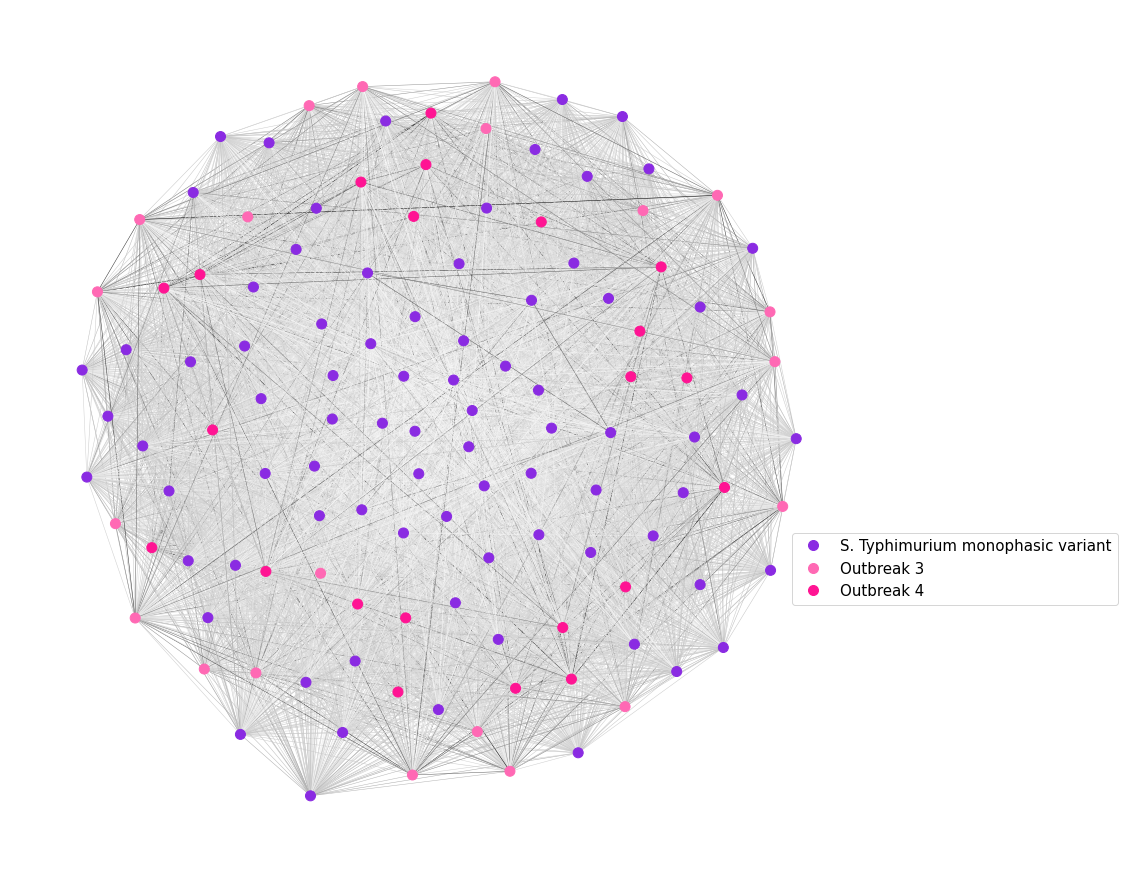

In [26]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=monophasic_graph,
        #pos=monophasic_node_pos,
        with_labels=False,
        node_size=100,
        node_color=monophasic_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), monophasic_weight_list)),
        edge_cmap=plt.cm.Greys_r,
        labels=monophasic_label_dic)

#Legend
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy_mono, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)

plt.show()

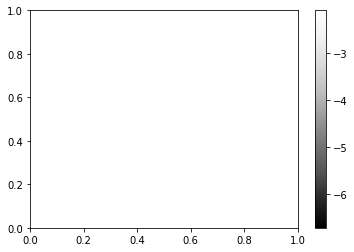

In [27]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), monophasic_weight_list))),
                              vmax=max(list(map(lambda x: np.log(x), monophasic_weight_list))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

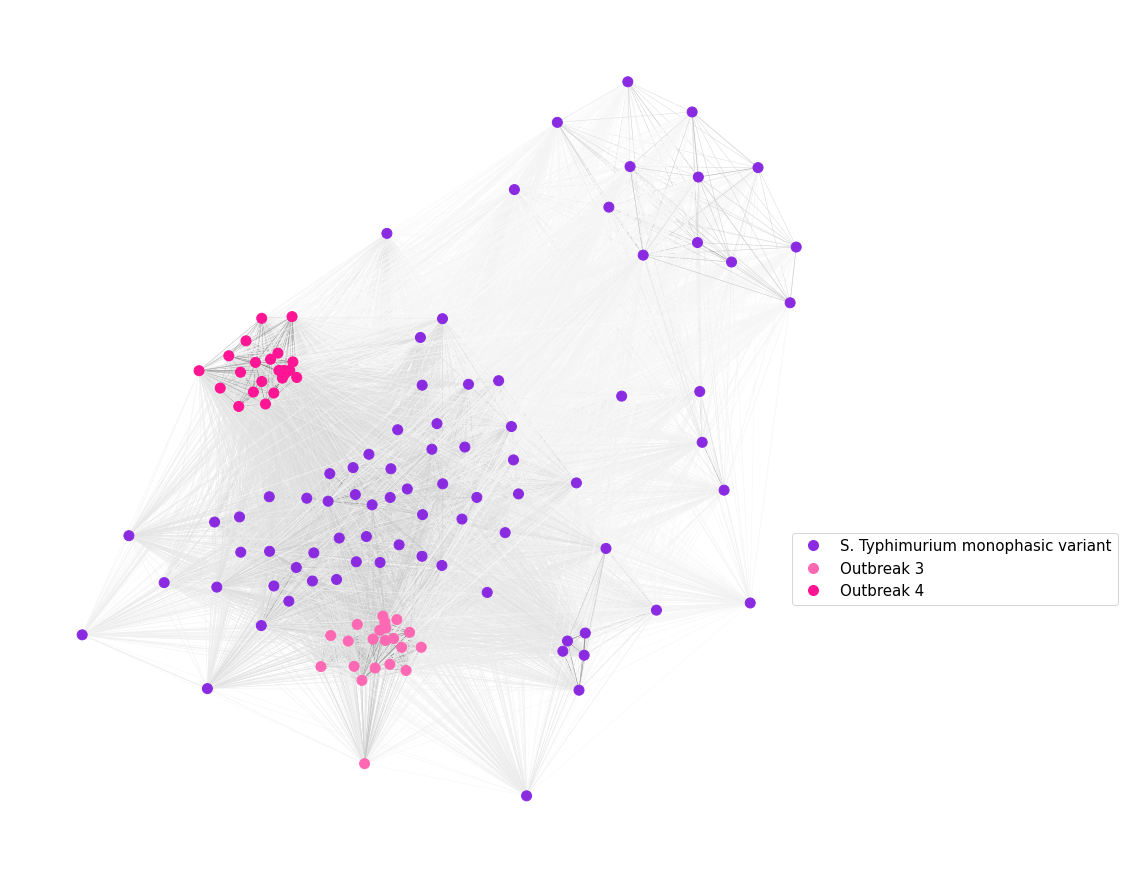

In [28]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=monophasic_graph,
        pos=monophasic_node_pos,
        with_labels=False,
        node_size=100,
        node_color=monophasic_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), monophasic_weight_list)),
        edge_cmap=plt.cm.Greys_r,
        labels=monophasic_label_dic)

#Legend
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy_mono, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)
    
plt.show()

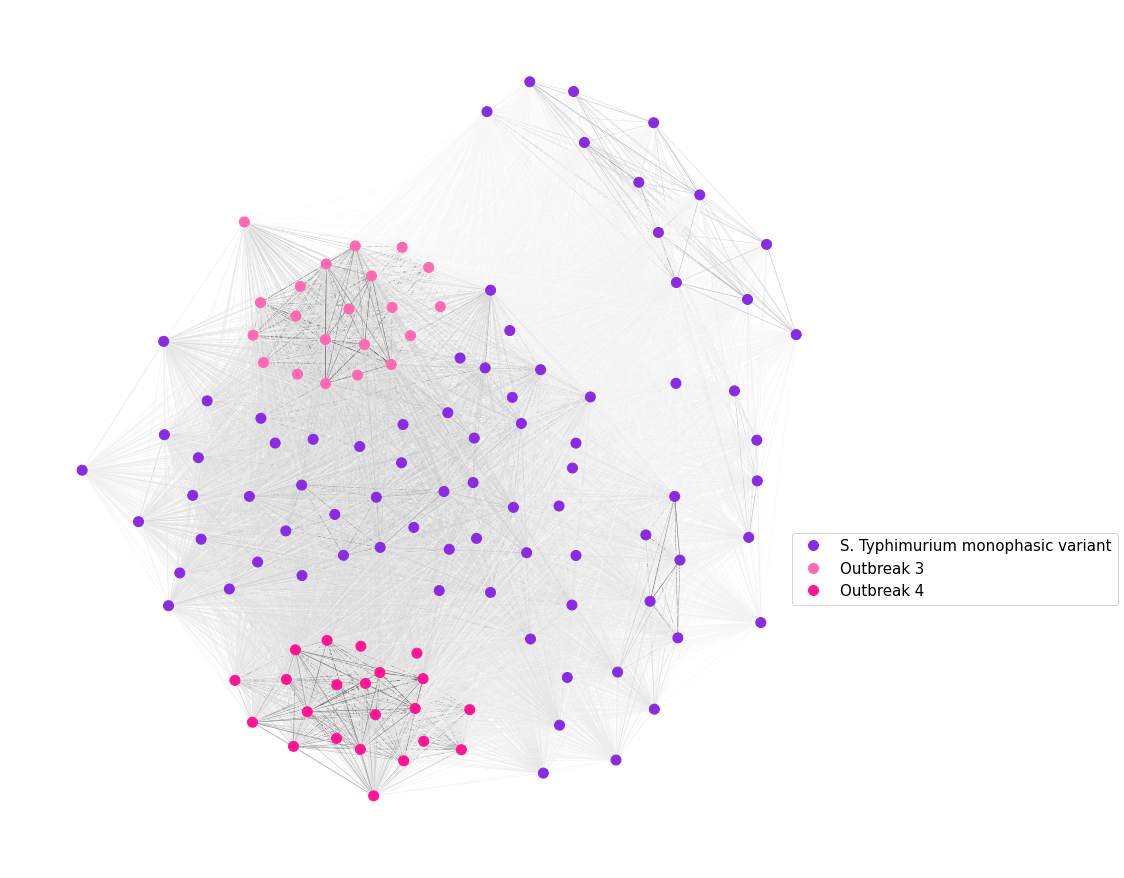

In [29]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=monophasic_graph2,
        pos=monophasic_node_pos2,
        with_labels=False,
        node_size=100,
        node_color=monophasic_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), monophasic_weight_list2)),
        edge_cmap=plt.cm.Greys_r,
        labels=monophasic_label_dic)

#Legend
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy_mono, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)

plt.show()

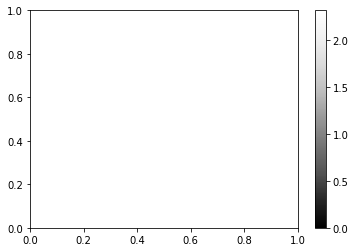

In [30]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), monophasic_weight_list2))),
                              vmax=max(list(map(lambda x: np.log(x), monophasic_weight_list2))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

S.TYPHIMURIUM

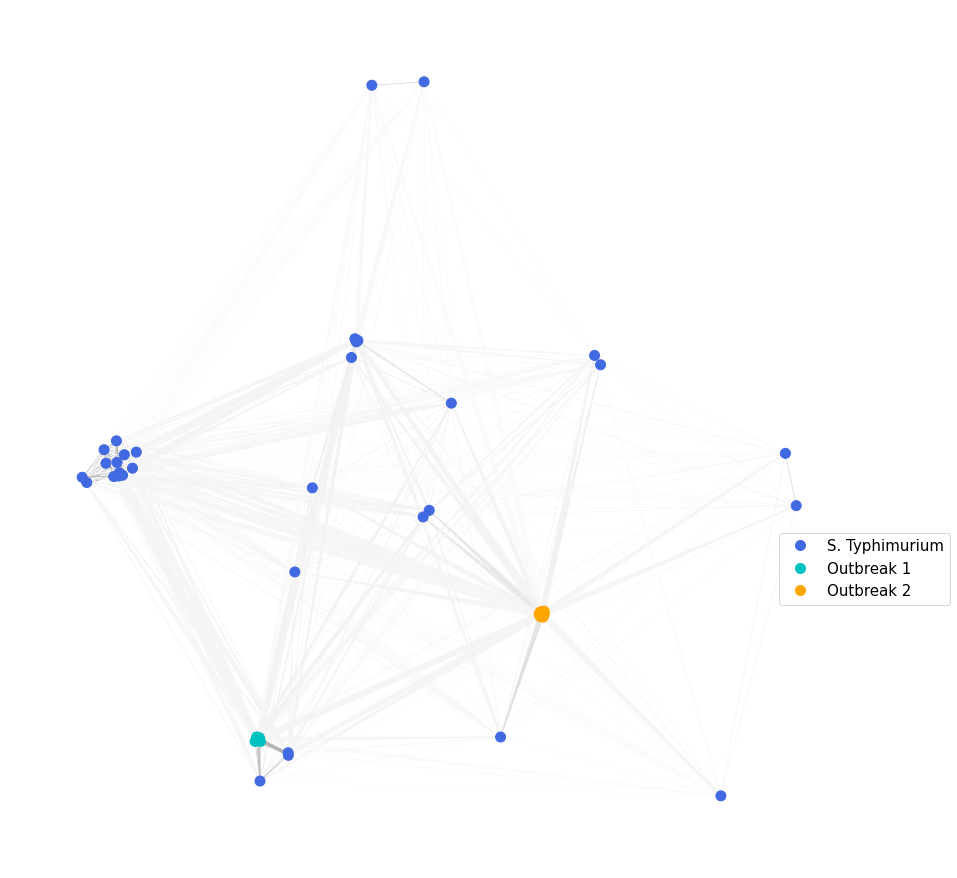

In [31]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=typhimurium_graph,
        pos=typhimurium_node_pos,
        with_labels=False,
        node_size=100,
        node_color=typhimurium_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), typhimurium_weight_list)),
        edge_cmap=plt.cm.Greys_r,
        labels=typhimurium_label_dic)

#Legend
s_typhy = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=10, label='S. Typhimurium')
out_1 = mlines.Line2D([], [], color='c', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Outbreak 2')

plt.legend(handles=[s_typhy, out_1, out_2],
           bbox_to_anchor=(1.1, 0.4),
           fontsize=15)

plt.show()

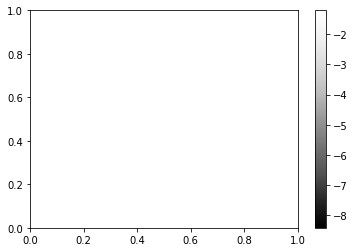

In [32]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), typhimurium_weight_list))),
                              vmax=max(list(map(lambda x: np.log(x), typhimurium_weight_list))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

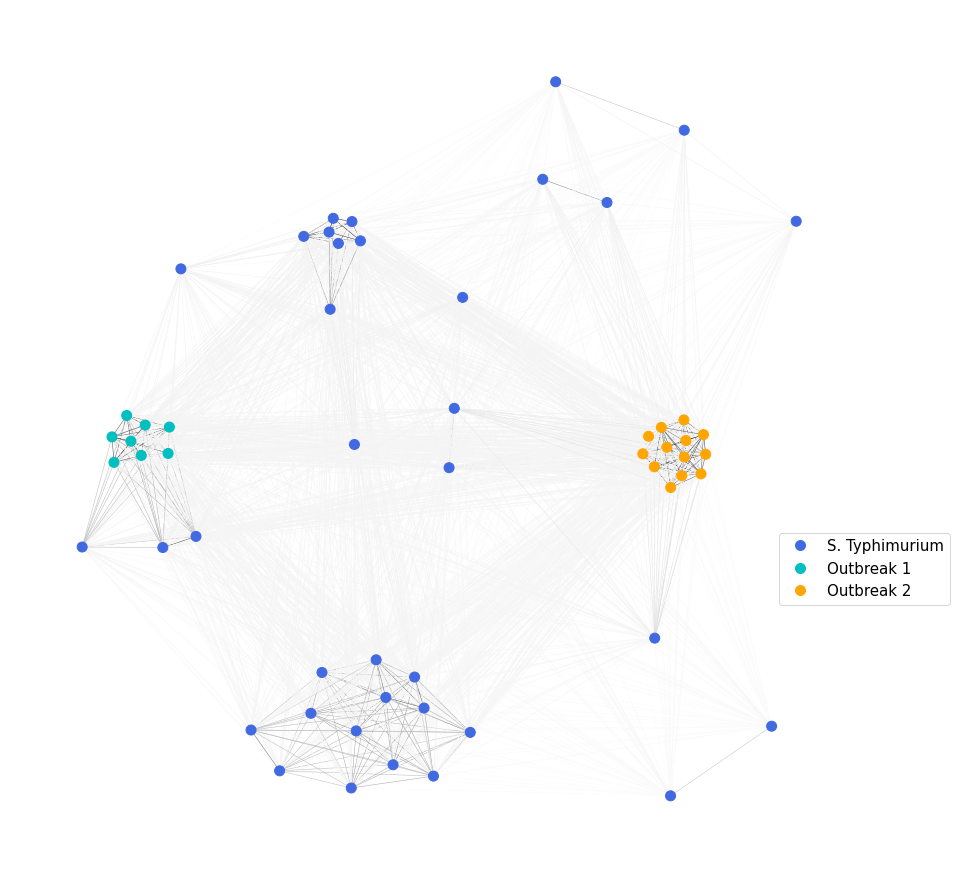

In [33]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=typhimurium_graph2,
        pos=typhimurium_node_pos2,
        with_labels=False,
        node_size=100,
        node_color=typhimurium_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), typhimurium_weight_list2)),
        edge_cmap=plt.cm.Greys_r,
        labels=typhimurium_label_dic)

#Legend
s_typhy = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=10, label='S. Typhimurium')
out_1 = mlines.Line2D([], [], color='c', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Outbreak 2')

plt.legend(handles=[s_typhy, out_1, out_2],
           bbox_to_anchor=(1.1, 0.4),
           fontsize=15)

plt.show()

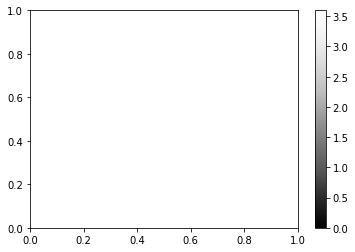

In [34]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), typhimurium_weight_list2))),
                              vmax=max(list(map(lambda x: np.log(x), typhimurium_weight_list2))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

ALL

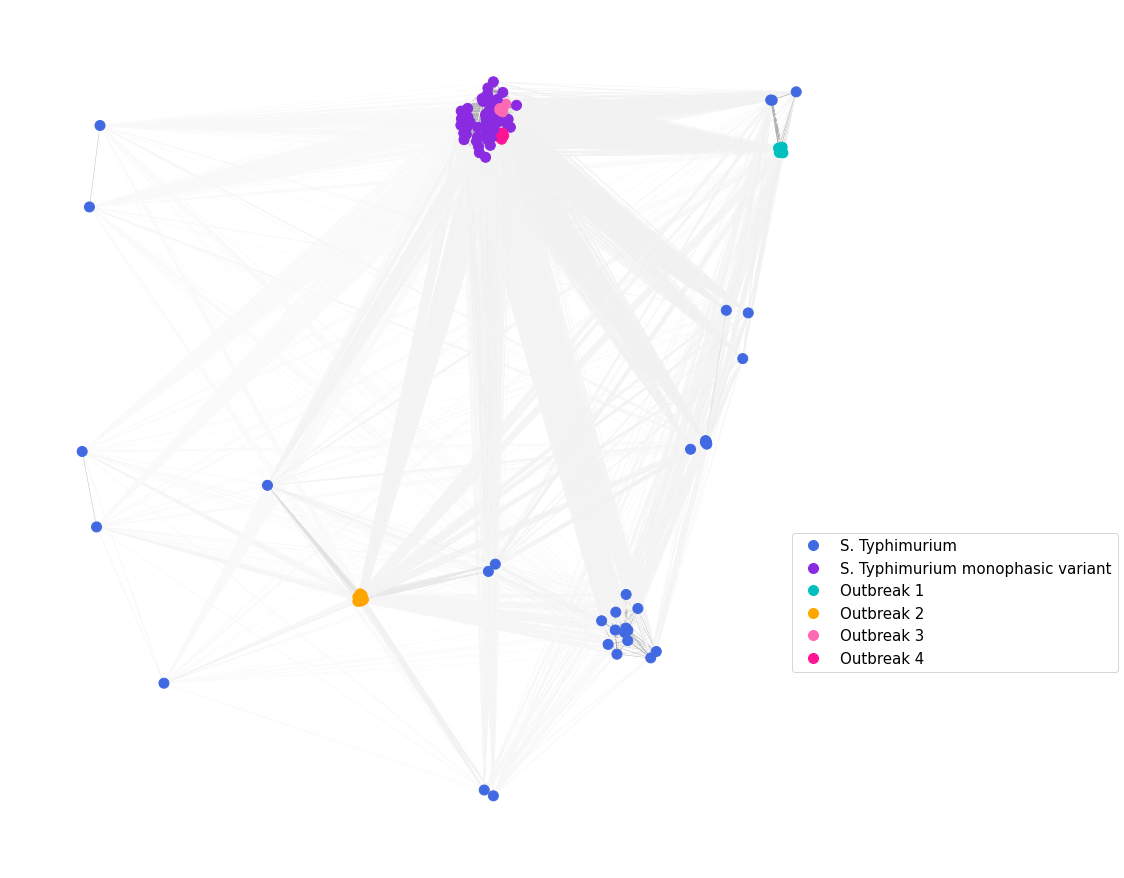

In [35]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=all_graph,
        pos=all_node_pos,
        with_labels=False,
        node_size=100,
        node_color=all_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), all_weight_list)),
        edge_cmap=plt.cm.Greys_r,
        labels=all_label_dic)

#Legend
s_typhy = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=10, label='S. Typhimurium')
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_1 = mlines.Line2D([], [], color='c', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Outbreak 2')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy, s_typhy_mono, out_1, out_2, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)

plt.show()

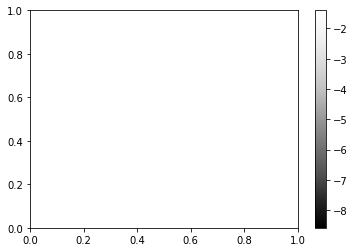

In [36]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), all_weight_list))),
                              vmax=max(list(map(lambda x: np.log(x), all_weight_list))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

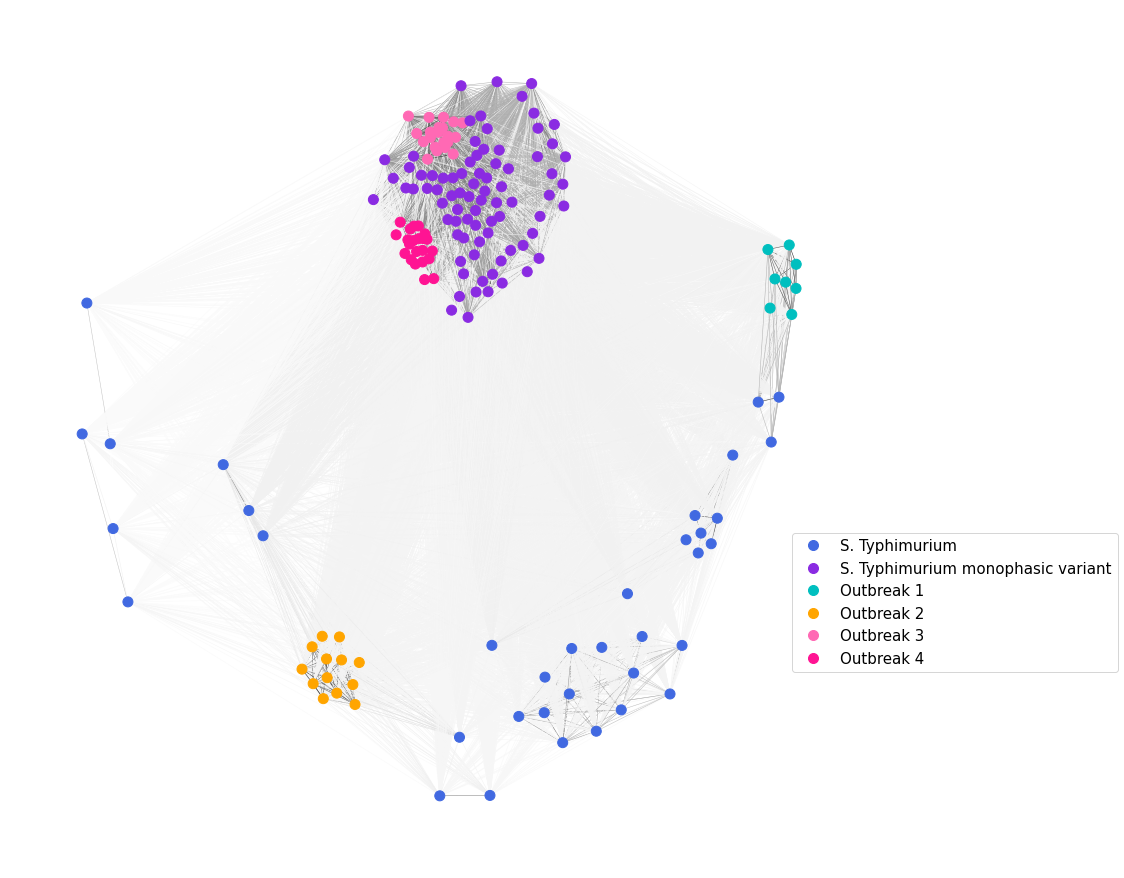

In [37]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=all_graph2,
        pos=all_node_pos2,
        with_labels=False,
        node_size=100,
        node_color=all_color_list,
        width=0.5,
        edge_color=list(map(lambda x: np.log(x), all_weight_list2)),
        edge_cmap=plt.cm.Greys_r,
        labels=all_label_dic)

#Legend
s_typhy = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=10, label='S. Typhimurium')
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_1 = mlines.Line2D([], [], color='c', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Outbreak 2')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy, s_typhy_mono, out_1, out_2, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)

plt.show()

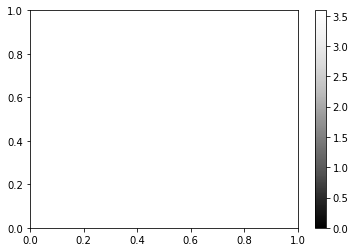

In [38]:
# Gray scale
normalize = mcolors.Normalize(vmin=min(list(map(lambda x: np.log(x), all_weight_list2))),
                              vmax=max(list(map(lambda x: np.log(x), all_weight_list2))))
colormap = plt.cm.Greys_r
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
plt.colorbar(scalarmappable)

##**Determination of a "relationship threshold"**

In [39]:
all_label_list=[]

for name in all_df.index:
  all_label_list.append(excel.type[list(excel.id).index(name)])

In [40]:
# Creation of new dataframes for each group (it will help for implementing a rational approach for 'group' definition)
all_df['type'] = all_label_list
grp1_df = all_df.loc[(all_df['type']==1),:]
grp2_df = all_df.loc[(all_df['type']==2),:]
grp3_df = all_df.loc[(all_df['type']==3),:]
grp4_df = all_df.loc[(all_df['type']==4),:]

# Elimination of 'type' column
del(all_df['type'])
del(grp1_df['type'])
del(grp2_df['type'])
del(grp3_df['type'])
del(grp4_df['type'])

Creation of distance matrices

In [41]:
# All
all_distance = distance_matrix(np.asarray(all_df), np.asarray(all_df))

# By groups
grp1_distance = distance_matrix(np.asarray(grp1_df), np.asarray(grp1_df))
grp2_distance = distance_matrix(np.asarray(grp2_df), np.asarray(grp2_df))
grp3_distance = distance_matrix(np.asarray(grp3_df), np.asarray(grp3_df))
grp4_distance = distance_matrix(np.asarray(grp4_df), np.asarray(grp4_df))

# Between groups
grp1_2_distance = distance_matrix(np.asarray(grp1_df), np.asarray(grp2_df))
grp1_3_distance = distance_matrix(np.asarray(grp1_df), np.asarray(grp3_df))
grp1_4_distance = distance_matrix(np.asarray(grp1_df), np.asarray(grp4_df))

grp2_3_distance = distance_matrix(np.asarray(grp2_df), np.asarray(grp3_df))
grp2_4_distance = distance_matrix(np.asarray(grp2_df), np.asarray(grp4_df))

grp3_4_distance = distance_matrix(np.asarray(grp3_df), np.asarray(grp4_df))

In [42]:
# Creation of distances lists
all_distance_list = all_distance.ravel().tolist()

by_group_distance_list = grp1_distance.ravel().tolist()+ \
                         grp2_distance.ravel().tolist()+ \
                         grp3_distance.ravel().tolist()+ \
                         grp4_distance.ravel().tolist()

between_groups_distance_list  = grp1_2_distance.ravel().tolist()+ \
                                grp1_3_distance.ravel().tolist()+ \
                                grp1_4_distance.ravel().tolist()+ \
                                grp2_3_distance.ravel().tolist()+ \
                                grp2_4_distance.ravel().tolist()+ \
                                grp3_4_distance.ravel().tolist()

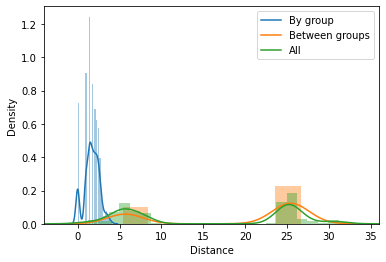

In [43]:
fig = sns.distplot(by_group_distance_list)
fig = sns.distplot(between_groups_distance_list)
fig = sns.distplot(all_distance_list)

fig.legend(labels=['By group', 'Between groups', 'All'])
fig.set(xlabel='Distance')
fig.set_xlim(-4, 36)

plt.show()

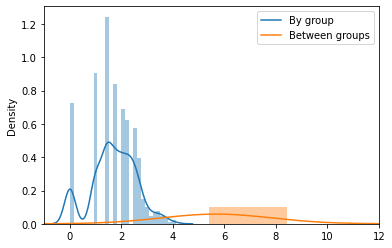

In [44]:
fig = sns.distplot(by_group_distance_list)
fig = sns.distplot(between_groups_distance_list)

fig.legend(labels=['By group','Between groups'])
fig.set_xlim(-1,12)

plt.show()

Representation of edges with a distance <= max distance by outbreaks

In [45]:
max(by_group_distance_list)

4.123105625617661

In [46]:
all_weight_list = list(nx.get_edge_attributes(all_graph2,'weight').values())
monophasic_weight_list = list(nx.get_edge_attributes(monophasic_graph2,'weight').values())
typhimurium_weight_list = list(nx.get_edge_attributes(typhimurium_graph2,'weight').values())

In [47]:
# Recuperation of indices of interest
index_list=[]
for i in range(len(all_weight_list)):
  if all_weight_list[i] <= max(by_group_distance_list):
    index_list.append(i)

In [48]:
selected_edges=[]

for i in range(len(index_list)):
  selected_edges.append(list(all_graph.edges)[index_list[i]])

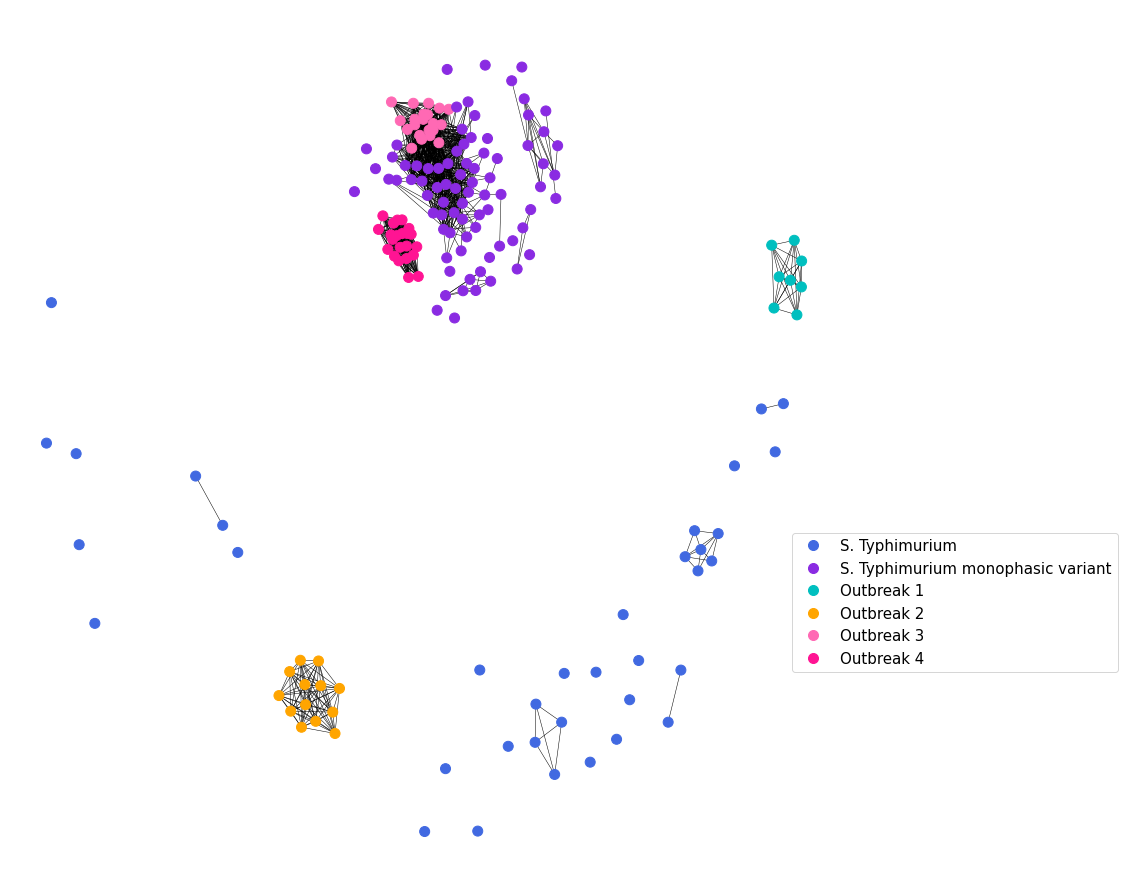

In [49]:
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=all_graph2,
        pos=all_node_pos2,
        with_labels=False,
        edgelist=selected_edges,
        node_size=100,
        node_color=all_color_list,
        width=0.5,
        #edge_color='Grey',
        #edge_cmap=plt.cm.Greys_r,
        labels=all_label_dic)

#Legend
s_typhy = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=10, label='S. Typhimurium')
s_typhy_mono = mlines.Line2D([], [], color='blueviolet', marker='o', linestyle='None', markersize=10, label='S. Typhimurium monophasic variant')
out_1 = mlines.Line2D([], [], color='c', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Outbreak 2')
out_3 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=10, label='Outbreak 4')

plt.legend(handles=[s_typhy, s_typhy_mono, out_1, out_2, out_3, out_4],
           bbox_to_anchor=(0.9, 0.4),
           fontsize=15)

plt.show()

In [50]:
def max_distance(resolution, dataframe):
  '''
  Function that cut an alignement file (dataframe format) in pieces (depending on the resolution parameter),
  and calculate the maximum distance for each 'piece size'. The sequences are shuffled in order to avoid
  'staircase'visualization.
    Args: resolution (number of x points) and dataframe (alignment file).
    Returns: list [x, y] where x correspond to the sequence length and y to the max distance.
  '''

  slice_index=0
  slices_list=[]
  cutoff=[]

  for i in range(resolution-1):
    slice_index+=round((len(dataframe.columns)/resolution))
    slices_list.append(slice_index)
  slices_list.append(len(dataframe.columns))

  for i in range(len(slices_list)):
    distance_list=[]
    simulated_df = dataframe[random.sample(range(len(dataframe.columns)), slices_list[i])]
    distance = distance_matrix(np.asarray(simulated_df), np.asarray(simulated_df))
    distance_list.append(max(distance.ravel().tolist()))

    cutoff.append(max(distance_list))

  return [slices_list, cutoff]

In [51]:
[x_all, y_all] = max_distance(100, all_df)

[x1, y1] = max_distance(100, grp1_df)
[x2, y2] = max_distance(100, grp2_df)
[x3, y3] = max_distance(100, grp3_df)
[x4, y4] = max_distance(100, grp4_df)

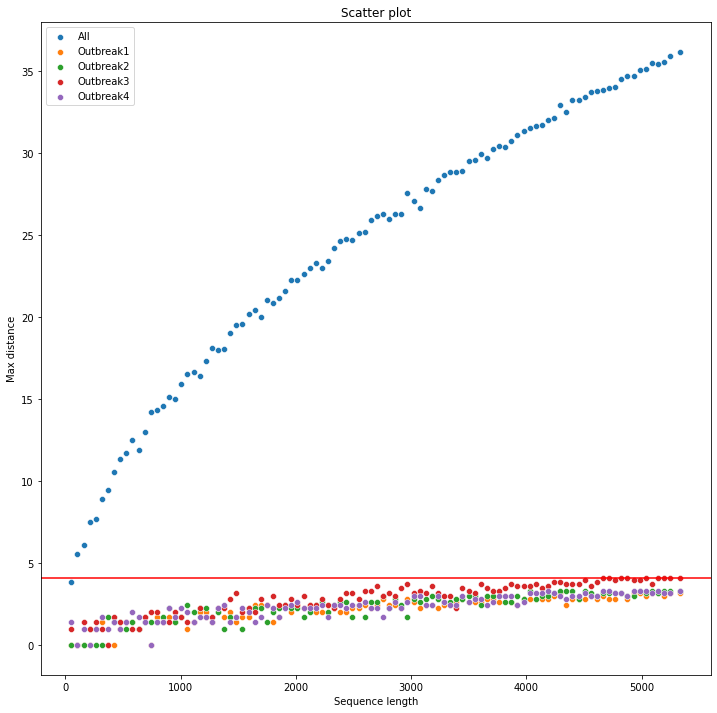

In [52]:
plt.figure(3,figsize=(12, 12)) 
fig = sns.scatterplot(x_all, y_all)

fig = sns.scatterplot(x1, y1)
fig = sns.scatterplot(x2, y2)
fig = sns.scatterplot(x3, y3)
fig = sns.scatterplot(x4, y4)

fig.legend(labels=['All', 'Outbreak1', 'Outbreak2', 'Outbreak3', 'Outbreak4'])
fig.set(xlabel='Sequence length', ylabel='Max distance', title='Scatter plot')
fig.axhline(max(by_group_distance_list), color='red')

fig.set_ylim

plt.show()

##**Testing of the construction method on a denser dataset**

In [53]:
e_coli_id_list = []
seq_list = []

for record in SeqIO.parse('/content/drive/MyDrive/long_project/alignement_ecoli/ecoli_SNPs.fasta', 'fasta'):
  e_coli_id_list.append(record.id)
  seq_list.append(record.seq)

e_coli_df = pd.DataFrame(np.asarray(seq_list),
                      index=e_coli_id_list,
                      columns=range(len(seq_list[:][0])))

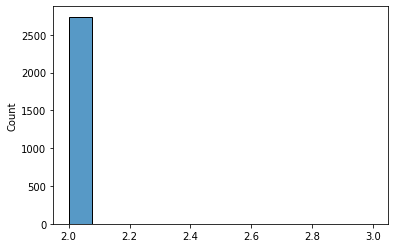

In [54]:
unique_list=[]
for i in range(len(e_coli_df.columns)):
  unique_list.append(e_coli_df[i].describe()['unique'])

sns.histplot(unique_list)

In [55]:
letter_count = e_coli_df.describe()

for i in range(len(e_coli_df.columns)):
  e_coli_df[i] = e_coli_df[i].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

In [56]:
e_coli_distance = distance_matrix(np.asarray(e_coli_df), np.asarray(e_coli_df))

In [57]:
# Graph creation
e_coli_graph = nx.convert_matrix.from_numpy_matrix(e_coli_distance)

In [58]:
# Node positioning
e_coli_node_pos = nx.kamada_kawai_layout(e_coli_graph)

In [59]:
# Node labelling
e_coli_label_dic = find_labels(e_coli_id_list)
e_coli_excel = pd.read_excel("/content/drive/MyDrive/long_project/alignement_ecoli/ecoli_metadata.ods")

In [62]:
def find_colors2(excel, dataframe):
  '''
  Function that associate a color to a label.
    Args: Excel of metadata file and alignment file under dataframe format.
    Return: Color list.
  '''

  label_list=[]
  color_list=[]

  for name in dataframe.index:
    label_list.append(excel['Sporadic/ Outbreak'][list(excel.Run).index(name)])

  for label in label_list:
    if label == 'Outbreak 1':
      color_list.append('midnightblue')
    elif label == 'Outbreak 2':
      color_list.append('coral')
    elif label == 'Outbreak 3':
      color_list.append('mediumvioletred')
    elif label == 'Outbreak 4':
      color_list.append('greenyellow')
    elif label == 'Outbreak 5':
      color_list.append('deepskyblue')
    elif label == 'Outbreak 6':
      color_list.append('purple')
    elif label == 'Outbreak 7':
      color_list.append('g')
    elif label == 'Outbreak 8':
      color_list.append('darkcyan')
    elif label == 'Sporadic':
      color_list.append('darkgray')
    elif label == 'Excluded from Outbreak 2 based on MLVA':
      color_list.append('lightgrey')

  return color_list

In [63]:
e_coli_color_list = find_colors2(e_coli_excel, e_coli_df)

In [64]:
# Edge values 
e_coli_weight_list = list(nx.get_edge_attributes(e_coli_graph,'weight').values())

e_coli_index_list=[]
for i in range(len(e_coli_weight_list)):
  if e_coli_weight_list[i] <= 2.06:
    e_coli_index_list.append(i)

e_coli_selected_edges=[]

for i in range(len(e_coli_index_list)):
  e_coli_selected_edges.append(list(e_coli_graph.edges)[e_coli_index_list[i]])

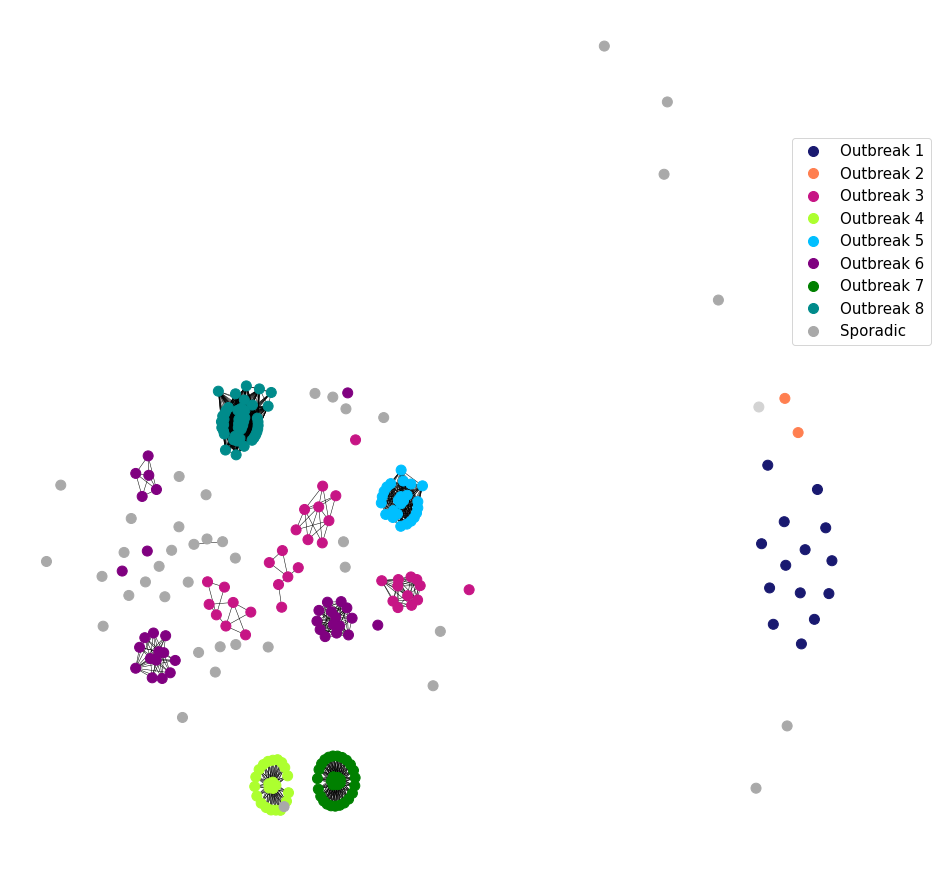

In [65]:
#Drawing
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=e_coli_graph,
        pos=e_coli_node_pos,
        with_labels=False,
        edgelist=e_coli_selected_edges,
        node_size=100,
        node_color=e_coli_color_list,
        width=0.5,
        #edge_color=list(map(lambda x: np.log(x), e_coli_weight_list)),
        #edge_cmap=plt.cm.Greys_r,
        labels=e_coli_label_dic)

#Legend
out_1 = mlines.Line2D([], [], color='midnightblue', marker='o', linestyle='None', markersize=10, label='Outbreak 1')
out_2 = mlines.Line2D([], [], color='coral', marker='o', linestyle='None', markersize=10, label='Outbreak 2')
out_3 = mlines.Line2D([], [], color='mediumvioletred', marker='o', linestyle='None', markersize=10, label='Outbreak 3')
out_4 = mlines.Line2D([], [], color='greenyellow', marker='o', linestyle='None', markersize=10, label='Outbreak 4')
out_5 = mlines.Line2D([], [], color='deepskyblue', marker='o', linestyle='None', markersize=10, label='Outbreak 5')
out_6 = mlines.Line2D([], [], color='purple', marker='o', linestyle='None', markersize=10, label='Outbreak 6')
out_7 = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='Outbreak 7')
out_8 = mlines.Line2D([], [], color='darkcyan', marker='o', linestyle='None', markersize=10, label='Outbreak 8')
sporadic = mlines.Line2D([], [], color='darkgray', marker='o', linestyle='None', markersize=10, label='Sporadic')

plt.legend(handles=[out_1, out_2, out_3, out_4, out_5, out_6, out_7, out_8, sporadic],
           bbox_to_anchor=(0.9, 0.6),
           fontsize=15)

plt.show()

##**Testing of the construction method on a "not-annotated" dataset:**

In [66]:
prediction_id_list = []
seq_list = []

for record in SeqIO.parse('/content/drive/MyDrive/long_project/alignement_prediction_variant_mono/variant_mono_SNPs.fasta', 'fasta'):
  prediction_id_list.append(record.id)
  seq_list.append(record.seq)

prediction_df = pd.DataFrame(np.asarray(seq_list),
                      index=prediction_id_list,
                      columns=range(len(seq_list[:][0])))

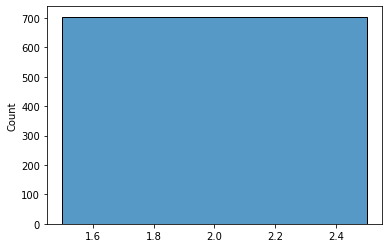

In [67]:
unique_list=[]
for i in range(len(prediction_df.columns)):
  unique_list.append(prediction_df[i].describe()['unique'])

sns.histplot(unique_list)

In [68]:
letter_count = prediction_df.describe()

for i in range(len(prediction_df.columns)):
  prediction_df[i] = prediction_df[i].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

In [69]:
prediction_distance = distance_matrix(np.asarray(prediction_df), np.asarray(prediction_df))

In [70]:
# Graph creation
prediction_graph = nx.convert_matrix.from_numpy_matrix(prediction_distance)

In [71]:
# Nodes positioning
prediction_node_pos = nx.kamada_kawai_layout(prediction_graph)

In [72]:
# Nodes labelling
prediction_label_dic = find_labels(prediction_id_list)

In [73]:
# Edge values
prediction_weight_list = list(nx.get_edge_attributes(prediction_graph,'weight').values())

prediction_index_list=[]
for i in range(len(prediction_weight_list)):
  if prediction_weight_list[i] <= 4.12:
    prediction_index_list.append(i)

prediction_selected_edges=[]

for i in range(len(prediction_index_list)):
  prediction_selected_edges.append(list(prediction_graph.edges)[prediction_index_list[i]])

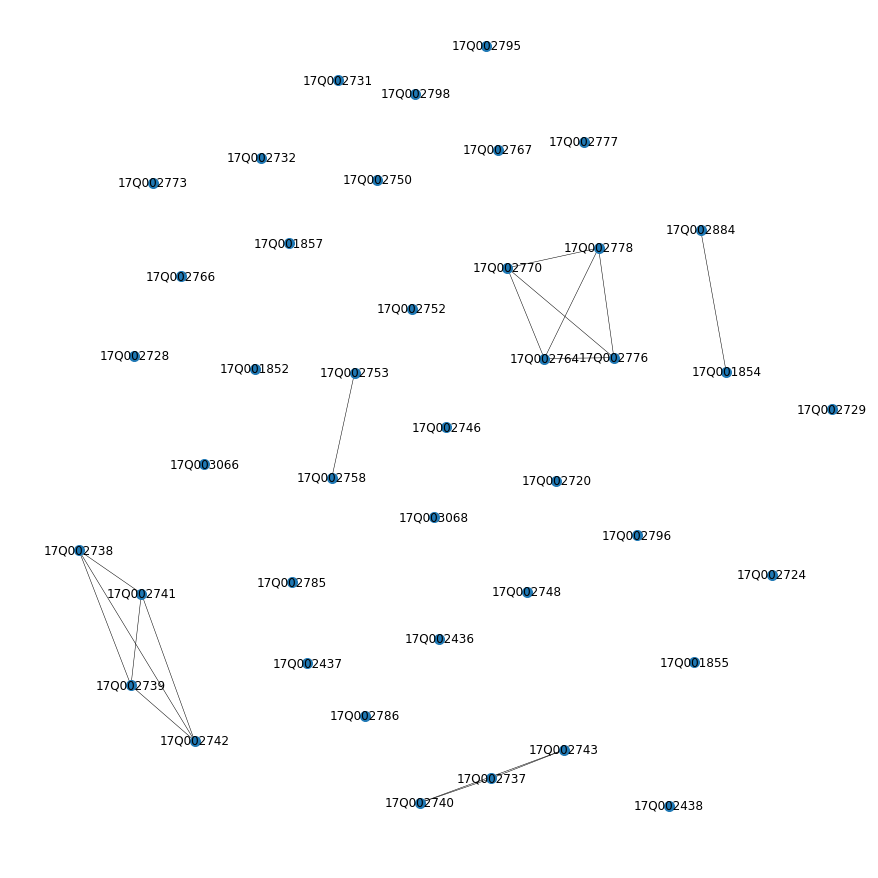

In [74]:
# Drawing
plt.figure(3,figsize=(12, 12)) 
nx.draw(G=prediction_graph,
        pos=prediction_node_pos,
        with_labels=True,
        edgelist=prediction_selected_edges,
        node_size=100,
        width=0.5,
        #edge_color=list(map(lambda x: np.log(x), prediction_weight_list)),
        #edge_cmap=plt.cm.Greys_r,
        labels=prediction_label_dic)

plt.show()